# Dataframes

In [1]:
import pandas as pd

# Create 3 series
purchase_1 = pd.Series({'Name': 'Chris',
                        'Item Purchased': 'Dog Food',
                        'Cost': 22.50})
purchase_2 = pd.Series({'Name': 'Kevyn',
                        'Item Purchased': 'Kitty Litter',
                        'Cost': 2.50})
purchase_3 = pd.Series({'Name': 'Vinod',
                        'Item Purchased': 'Bird Seed',
                        'Cost': 5.00})

# Create dataframe, add indexes
df1 = pd.DataFrame([purchase_1, purchase_2, purchase_3], index=['Store 1', 'Store 1', 'Store 2'])
df1


,Name,Item Purchased,Cost
Store 1,Chris,Dog Food,22.5
Store 1,Kevyn,Kitty Litter,2.5
Store 2,Vinod,Bird Seed,5.0


In [2]:
# Promote column to index
df1 = df1.set_index([df1.index, 'Name'])
df1

Item Purchased  Cost
        Name                      
Store 1 Chris       Dog Food  22.5
        Kevyn   Kitty Litter   2.5
Store 2 Vinod      Bird Seed   5.0

In [3]:
# Rename indexes
df1.index.names = ['Location', 'Name']
df1

Item Purchased  Cost
Location Name                      
Store 1  Chris       Dog Food  22.5
         Kevyn   Kitty Litter   2.5
Store 2  Vinod      Bird Seed   5.0

In [4]:
# Append a new record
df1 = df1.append(pd.Series(data={'Cost': 3.00, 'Item Purchased': 'Kitty Food'}, name=('Store 2', 'Kevyn')))
df1

Item Purchased  Cost
Location Name                      
Store 1  Chris       Dog Food  22.5
         Kevyn   Kitty Litter   2.5
Store 2  Vinod      Bird Seed   5.0
         Kevyn     Kitty Food   3.0

In [5]:
# Refresh dataframe
# Create 3 series
purchase_1 = pd.Series({'Name': 'Chris',
                        'Item Purchased': 'Dog Food',
                        'Cost': 22.50})
purchase_2 = pd.Series({'Name': 'Kevyn',
                        'Item Purchased': 'Kitty Litter',
                        'Cost': 2.50})
purchase_3 = pd.Series({'Name': 'Vinod',
                        'Item Purchased': 'Bird Seed',
                        'Cost': 5.00})

# Create dataframe, add indexes
df2 = pd.DataFrame([purchase_1, purchase_2, purchase_3], index=['Store 1', 'Store 1', 'Store 2'])
df2

,Name,Item Purchased,Cost
Store 1,Chris,Dog Food,22.5
Store 1,Kevyn,Kitty Litter,2.5
Store 2,Vinod,Bird Seed,5.0


In [6]:
# Return specific record by index
df2.loc['Store 2']

Name                  Vinod
Item Purchased    Bird Seed
Cost                      5
Name: Store 2, dtype: object

In [7]:
# Print the data type of the return
type(df2.loc['Store 2'])

pandas.core.series.Series

In [8]:
# Return column
#%timeit -n 100
df2['Item Purchased']

Store 1        Dog Food
Store 1    Kitty Litter
Store 2       Bird Seed
Name: Item Purchased, dtype: object

In [9]:
# Return specific rows in column
df2.loc['Store 1']['Cost']

Store 1    22.5
Store 1     2.5
Name: Cost, dtype: float64

In [10]:
# Transpose dataframe (turns column names into indexes)
df2.T

,Store 1,Store 1,Store 2
Name,Chris,Kevyn,Vinod
Item Purchased,Dog Food,Kitty Litter,Bird Seed
Cost,22.5,2.5,5


In [11]:
# Return all Name and Cost rows
df2.loc[:,['Name', 'Cost']]

,Name,Cost
Store 1,Chris,22.5
Store 1,Kevyn,2.5
Store 2,Vinod,5.0


In [12]:
# Drop rows. Returns a copy of the dataframe, the original stays the same.
df2.drop('Store 1')

,Name,Item Purchased,Cost
Store 2,Vinod,Bird Seed,5.0


In [13]:
# Drop and save the view
copy_df2 = df2.copy()
copy_df2 = copy_df2.drop('Store 1')
copy_df2

,Name,Item Purchased,Cost
Store 2,Vinod,Bird Seed,5.0


In [14]:
# Drop a column directly on the dataframe and does not return a view
del copy_df2['Name']
copy_df2

,Item Purchased,Cost
Store 2,Bird Seed,5.0


In [15]:
# Add a column
df2['Location'] = None
df2

,Name,Item Purchased,Cost,Location
Store 1,Chris,Dog Food,22.5,None
Store 1,Kevyn,Kitty Litter,2.5,None
Store 2,Vinod,Bird Seed,5.0,None


In [16]:
# Add a column that is an operation of other columns
#df['X+Y'] = df['X'] + df['Y']

In [17]:
# Return first value of a column
# df['column_name'].iloc[0]

## Dataframe Indexing and Loading

In [18]:
# Update all rows in column
df2['Cost'] *= 0.8
df2

,Name,Item Purchased,Cost,Location
Store 1,Chris,Dog Food,18.0,None
Store 1,Kevyn,Kitty Litter,2.0,None
Store 2,Vinod,Bird Seed,4.0,None


In [19]:
# Import csv
path = 'Resources/Olympics.csv'
df3 = pd.read_csv(path)
df3.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,NaN,№ Summer,01 !,02 !,03 !,Total,№ Winter,01 !,02 !,03 !,Total,№ Games,01 !,02 !,03 !,Combined total
1,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
2,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
3,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
4,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12


In [20]:
# Makes first column an index, skips the first row
df3 = pd.read_csv(path, index_col = 0, skiprows=1)
df3.head()

,№ Summer,01 !,02 !,03 !,Total,№ Winter,01 !.1,02 !.1,03 !.1,Total.1,№ Games,01 !.2,02 !.2,03 !.2,Combined total
Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


In [21]:
# Returns column names
df3.columns

Index(['№ Summer', '01 !', '02 !', '03 !', 'Total', '№ Winter', '01 !.1',
       '02 !.1', '03 !.1', 'Total.1', '№ Games', '01 !.2', '02 !.2', '03 !.2',
       'Combined total'],
      dtype='object')

In [22]:
# Replaces characters in column name
for col in df3.columns:
    if col[:2]=='01':
        df3.rename(columns={col:'Gold' + col[4:]}, inplace=True)
    if col[:2]=='02':
        df3.rename(columns={col:'Silver' + col[4:]}, inplace=True)
    if col[:2]=='03':
        df3.rename(columns={col:'Bronze' + col[4:]}, inplace=True)
    if col[:1]=='№':
        df3.rename(columns={col:'#' + col[1:]}, inplace=True) 

df3.head()

,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total
Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


## Querying a DataFrame

In [23]:
# Returns a boolean mask - specific rows from specific column
df3['Gold'] > 0

Afghanistan (AFG)                               False
Algeria (ALG)                                    True
Argentina (ARG)                                  True
Armenia (ARM)                                    True
Australasia (ANZ) [ANZ]                          True
Australia (AUS) [AUS] [Z]                        True
Austria (AUT)                                    True
Azerbaijan (AZE)                                 True
Bahamas (BAH)                                    True
Bahrain (BRN)                                   False
Barbados (BAR) [BAR]                            False
Belarus (BLR)                                    True
Belgium (BEL)                                    True
Bermuda (BER)                                   False
Bohemia (BOH) [BOH] [Z]                         False
Botswana (BOT)                                  False
Brazil (BRA)                                     True
British West Indies (BWI) [BWI]                 False
Bulgaria (BUL) [H]          

In [24]:
# Apply boolean mask to dataframe
only_gold = df3.where(df3['Gold'] > 0)
only_gold.head()

,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total
Afghanistan (AFG),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria (ALG),12.0,5.0,2.0,8.0,15.0,3.0,0.0,0.0,0.0,0.0,15.0,5.0,2.0,8.0,15.0
Argentina (ARG),23.0,18.0,24.0,28.0,70.0,18.0,0.0,0.0,0.0,0.0,41.0,18.0,24.0,28.0,70.0
Armenia (ARM),5.0,1.0,2.0,9.0,12.0,6.0,0.0,0.0,0.0,0.0,11.0,1.0,2.0,9.0,12.0
Australasia (ANZ) [ANZ],2.0,3.0,4.0,5.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,4.0,5.0,12.0


In [25]:
# For specific column, count all rows. NaN is ignored.
only_gold['Gold'].count()

100

In [26]:
# For specific column, count all rows. NaN is ignored.
df3['Gold'].count()

147

In [27]:
# Drop NaN
only_gold = only_gold.dropna()
only_gold.head()

,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total
Algeria (ALG),12.0,5.0,2.0,8.0,15.0,3.0,0.0,0.0,0.0,0.0,15.0,5.0,2.0,8.0,15.0
Argentina (ARG),23.0,18.0,24.0,28.0,70.0,18.0,0.0,0.0,0.0,0.0,41.0,18.0,24.0,28.0,70.0
Armenia (ARM),5.0,1.0,2.0,9.0,12.0,6.0,0.0,0.0,0.0,0.0,11.0,1.0,2.0,9.0,12.0
Australasia (ANZ) [ANZ],2.0,3.0,4.0,5.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,4.0,5.0,12.0
Australia (AUS) [AUS] [Z],25.0,139.0,152.0,177.0,468.0,18.0,5.0,3.0,4.0,12.0,43.0,144.0,155.0,181.0,480.0


In [28]:
# Shortcut for removing NaN
only_gold = df3[df3['Gold'] > 0]
only_gold.head()

,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total
Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
Australia (AUS) [AUS] [Z],25,139,152,177,468,18,5,3,4,12,43,144,155,181,480


In [29]:
# Operations with multiple masks
df3[(df3['Gold'] > 0) | (df3['Gold.1'] > 0)].head()

,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total
Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
Australia (AUS) [AUS] [Z],25,139,152,177,468,18,5,3,4,12,43,144,155,181,480


In [30]:
# Operations with multiple masks
df3[(df3['Gold.1'] > 0) & (df3['Gold'] == 0)]

,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total
Liechtenstein (LIE),16,0,0,0,0,18,2,2,5,9,34,2,2,5,9


In [31]:
# Sort by column, return first index value
df3.sort_values(by=['Gold'], ascending=False).index[0]

'Totals'

## Indexing Dataframes

In [32]:
# Demote index to column
df3['country'] = df3.index

# Promote column to index
df3 = df3.set_index('Gold')
df3.head()

,# Summer,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total,country
Gold,,,,,,,,,,,,,,,
0,13,0,2,2,0,0,0,0,0,13,0,0,2,2,Afghanistan (AFG)
5,12,2,8,15,3,0,0,0,0,15,5,2,8,15,Algeria (ALG)
18,23,24,28,70,18,0,0,0,0,41,18,24,28,70,Argentina (ARG)
1,5,2,9,12,6,0,0,0,0,11,1,2,9,12,Armenia (ARM)
3,2,4,5,12,0,0,0,0,0,2,3,4,5,12,Australasia (ANZ) [ANZ]


In [33]:
# Reset index
df3 = df3.reset_index()
df3.head()

,Gold,# Summer,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total,country
0,0,13,0,2,2,0,0,0,0,0,13,0,0,2,2,Afghanistan (AFG)
1,5,12,2,8,15,3,0,0,0,0,15,5,2,8,15,Algeria (ALG)
2,18,23,24,28,70,18,0,0,0,0,41,18,24,28,70,Argentina (ARG)
3,1,5,2,9,12,6,0,0,0,0,11,1,2,9,12,Armenia (ARM)
4,3,2,4,5,12,0,0,0,0,0,2,3,4,5,12,Australasia (ANZ) [ANZ]


In [34]:
# Loads Census.csv
path = 'Resources/Census.csv'
df4 = pd.read_csv(path)
df4.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861


In [35]:
# Count unique column values
df4['SUMLEV'].unique()

array([40, 50], dtype=int64)

In [36]:
# Return only records where a column has specific value
df4=df4[df4['SUMLEV'] == 50]
df4.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411


### Question 6
**Only looking at the three most populous counties for each state**, what are the three most populous states (in order of highest population to lowest population)? Use `CENSUS2010POP`.

*This function should return a list of string values.*

In [37]:
# Group sort multiple columns sum rows
#    census_6 = census_df[census_df['SUMLEV'] == 50]
#    columns_to_keep = ['STNAME',
#                       'CTYNAME',
#                       'CENSUS2010POP']
#    census_6 = census_6[columns_to_keep]
#    census_6 = census_6.sort(['STNAME', 'CENSUS2010POP'], ascending=[True, False])
#    census_6 = census_6.groupby('STNAME').head(3).reset_index(drop=True)
#    census_6 = census_6.groupby('STNAME')['CENSUS2010POP'].sum().sort_values(ascending=False).index[:3]
#    return census_6.values.flatten().tolist()
# answer_six()

In [38]:
# Return only specific columns
columns_to_keep = ['STNAME',
                   'CTYNAME',
                   'BIRTHS2010',
                   'BIRTHS2011',
                   'BIRTHS2012',
                   'BIRTHS2013',
                   'BIRTHS2014',
                   'BIRTHS2015',
                   'POPESTIMATE2010',
                   'POPESTIMATE2011',
                   'POPESTIMATE2012',
                   'POPESTIMATE2013',
                   'POPESTIMATE2014',
                   'POPESTIMATE2015']
df4 = df4[columns_to_keep]
df4.head()

,STNAME,CTYNAME,BIRTHS2010,BIRTHS2011,BIRTHS2012,BIRTHS2013,BIRTHS2014,BIRTHS2015,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015
1,Alabama,Autauga County,151,636,615,574,623,600,54660,55253,55175,55038,55290,55347
2,Alabama,Baldwin County,517,2187,2092,2160,2186,2240,183193,186659,190396,195126,199713,203709
3,Alabama,Barbour County,70,335,300,283,260,269,27341,27226,27159,26973,26815,26489
4,Alabama,Bibb County,44,266,245,259,247,253,22861,22733,22642,22512,22549,22583
5,Alabama,Blount County,183,744,710,646,618,603,57373,57711,57776,57734,57658,57673


In [39]:
# Count unique values in a column and return the highest/lowest. In this case return the State with the most Counties.
# df4 = df4.groupby('STNAME')['CTYNAME'].nunique().sort_values(ascending=False).index[0]
# df4

In [40]:
# Set hierarchical indexes
df4 = df4.set_index(['STNAME', 'CTYNAME'])
df4.head()

BIRTHS2010  BIRTHS2011  BIRTHS2012  BIRTHS2013  \
STNAME  CTYNAME                                                          
Alabama Autauga County         151         636         615         574   
        Baldwin County         517        2187        2092        2160   
        Barbour County          70         335         300         283   
        Bibb County             44         266         245         259   
        Blount County          183         744         710         646   

                        BIRTHS2014  BIRTHS2015  POPESTIMATE2010  \
STNAME  CTYNAME                                                   
Alabama Autauga County         623         600            54660   
        Baldwin County        2186        2240           183193   
        Barbour County         260         269            27341   
        Bibb County            247         253            22861   
        Blount County          618         603            57373   

                        POPESTIMATE2011  POPESTIMATE2012  POPESTIMATE2013  \
STNAME  CTYNAME                                                             
Alabama Autauga County            55253            55175            55038   
        Baldwin County           186659           190396           195126   
        Barbour County            27226            27159            26973   
        Bibb County               22733            22642            22512   
        Blount County             57711            57776            57734   

                        POPESTIMATE2014  POPESTIMATE2015  
STNAME  CTYNAME                                           
Alabama Autauga County            55290            55347  
        Baldwin County           199713           203709  
        Barbour County            26815            26489  
        Bibb County               22549            22583  
        Blount County             57658            57673

In [41]:
# Return record based on hierarchical indexes
df4.loc['Michigan', 'Washtenaw County']

BIRTHS2010            977
BIRTHS2011           3826
BIRTHS2012           3780
BIRTHS2013           3662
BIRTHS2014           3683
BIRTHS2015           3709
POPESTIMATE2010    345563
POPESTIMATE2011    349048
POPESTIMATE2012    351213
POPESTIMATE2013    354289
POPESTIMATE2014    357029
POPESTIMATE2015    358880
Name: (Michigan, Washtenaw County), dtype: int64

In [42]:
# Return record based on multiple hierarchical indexes
df4.loc[ [('Michigan', 'Washtenaw County'),
         ('Michigan', 'Wayne County')] ]

BIRTHS2010  BIRTHS2011  BIRTHS2012  BIRTHS2013  \
STNAME   CTYNAME                                                            
Michigan Washtenaw County         977        3826        3780        3662   
         Wayne County            5918       23819       23270       23377   

                           BIRTHS2014  BIRTHS2015  POPESTIMATE2010  \
STNAME   CTYNAME                                                     
Michigan Washtenaw County        3683        3709           345563   
         Wayne County           23607       23586          1815199   

                           POPESTIMATE2011  POPESTIMATE2012  POPESTIMATE2013  \
STNAME   CTYNAME                                                               
Michigan Washtenaw County           349048           351213           354289   
         Wayne County              1801273          1792514          1775713   

                           POPESTIMATE2014  POPESTIMATE2015  
STNAME   CTYNAME                                             
Michigan Washtenaw County           357029           358880  
         Wayne County              1766008          1759335

## Missing Values

In [43]:
# Import csv
path = 'Resources/Log.csv'
df5 = pd.read_csv(path)
df5.head()

,time,user,video,playback position,paused,volume
0,1469974424,cheryl,intro.html,5,False,10.0
1,1469974454,cheryl,intro.html,6,NaN,NaN
2,1469974544,cheryl,intro.html,9,NaN,NaN
3,1469974574,cheryl,intro.html,10,NaN,NaN
4,1469977514,bob,intro.html,1,NaN,NaN


In [44]:
# Get row from column B based on row from column A (index)
# df = df.reset_index()
# df = df.set_index($columnA)
# df = df.sort_index()    
# df.loc[$RowFromColumnA][$columnB]

# Promote column to index
df5 = df5.set_index('time')

# Sort by index
df5 = df5.sort_index()
df5

,user,video,playback position,paused,volume
time,,,,,
1469974424,cheryl,intro.html,5,False,10.0
1469974424,sue,advanced.html,23,False,10.0
1469974454,cheryl,intro.html,6,NaN,NaN
1469974454,sue,advanced.html,24,NaN,NaN
1469974484,cheryl,intro.html,7,NaN,NaN
1469974514,cheryl,intro.html,8,NaN,NaN
1469974524,sue,advanced.html,25,NaN,NaN
1469974544,cheryl,intro.html,9,NaN,NaN
1469974554,sue,advanced.html,26,NaN,NaN


In [45]:
# Reset index
df5 = df5.reset_index()

# Set hierarchical indexes
df5 = df5.set_index(['time', 'user'])
df5

video  playback position paused  volume
time       user                                                   
1469974424 cheryl     intro.html                  5  False    10.0
           sue     advanced.html                 23  False    10.0
1469974454 cheryl     intro.html                  6    NaN     NaN
           sue     advanced.html                 24    NaN     NaN
1469974484 cheryl     intro.html                  7    NaN     NaN
1469974514 cheryl     intro.html                  8    NaN     NaN
1469974524 sue     advanced.html                 25    NaN     NaN
1469974544 cheryl     intro.html                  9    NaN     NaN
1469974554 sue     advanced.html                 26    NaN     NaN
1469974574 cheryl     intro.html                 10    NaN     NaN
1469974604 cheryl     intro.html                 11    NaN     NaN
1469974624 sue     advanced.html                 27    NaN     NaN
1469974634 cheryl     intro.html                 12    NaN     NaN
1469974654 sue     advanced.html                 28    NaN     5.0
1469974664 cheryl     intro.html                 13    NaN     NaN
1469974694 cheryl     intro.html                 14    NaN     NaN
1469974724 cheryl     intro.html                 15    NaN     NaN
           sue     advanced.html                 29    NaN     NaN
1469974754 sue     advanced.html                 30    NaN     NaN
1469974824 sue     advanced.html                 31    NaN     NaN
1469974854 sue     advanced.html                 32    NaN     NaN
1469974924 sue     advanced.html                 33    NaN     NaN
1469977424 bob        intro.html                  1   True    10.0
1469977454 bob        intro.html                  1    NaN     NaN
1469977484 bob        intro.html                  1    NaN     NaN
1469977514 bob        intro.html                  1    NaN     NaN
1469977544 bob        intro.html                  1    NaN     NaN
1469977574 bob        intro.html                  1    NaN     NaN
1469977604 bob        intro.html                  1    NaN     NaN
1469977634 bob        intro.html                  1    NaN     NaN
1469977664 bob        intro.html                  1    NaN     NaN
1469977694 bob        intro.html                  1    NaN     NaN
1469977724 bob        intro.html                  1    NaN     NaN

## Merging Dataframes

In [46]:
import pandas as pd

df6 = pd.DataFrame([{'Name': 'Chris', 'Item Purchased': 'Sponge', 'Cost': 22.50},
                   {'Name': 'Kevyn', 'Item Purchased': 'Kitty Litter', 'Cost': 2.50},
                   {'Name': 'Filip', 'Item Purchased': 'Spoon', 'Cost': 5.00}],
                  index=['Store 1', 'Store 1', 'Store 2'])
df6

,Cost,Item Purchased,Name
Store 1,22.5,Sponge,Chris
Store 1,2.5,Kitty Litter,Kevyn
Store 2,5.0,Spoon,Filip


In [47]:
# Manually add a column with values. The length of the column needs to match the number of records.
df6['Date'] = ['December 1', 'January 1', 'mid-May']
df6

,Cost,Item Purchased,Name,Date
Store 1,22.5,Sponge,Chris,December 1
Store 1,2.5,Kitty Litter,Kevyn,January 1
Store 2,5.0,Spoon,Filip,mid-May


In [48]:
# Manually add a column with flag (scaller value)
df6['Delivered'] = True
df6

,Cost,Item Purchased,Name,Date,Delivered
Store 1,22.5,Sponge,Chris,December 1,True
Store 1,2.5,Kitty Litter,Kevyn,January 1,True
Store 2,5.0,Spoon,Filip,mid-May,True


In [49]:
# Manually add a column with missing records
df6['Feedback'] = ['Positive', None, 'Negative']
df6

,Cost,Item Purchased,Name,Date,Delivered,Feedback
Store 1,22.5,Sponge,Chris,December 1,True,Positive
Store 1,2.5,Kitty Litter,Kevyn,January 1,True,None
Store 2,5.0,Spoon,Filip,mid-May,True,Negative


In [50]:
# Overwrite / edit column values
adf = df6.reset_index()
adf['Date'] = pd.Series({0: 'December 1', 2: 'mid-May'})
adf

,index,Cost,Item Purchased,Name,Date,Delivered,Feedback
0,Store 1,22.5,Sponge,Chris,December 1,True,Positive
1,Store 1,2.5,Kitty Litter,Kevyn,NaN,True,None
2,Store 2,5.0,Spoon,Filip,mid-May,True,Negative


In [51]:
# New dataframe
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                         {'Name': 'Sally', 'Role': 'Course liasion'},
                         {'Name': 'James', 'Role': 'Grader'}])
staff_df = staff_df.set_index('Name')
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Sally', 'School': 'Engineering'}])
student_df = student_df.set_index('Name')
print(staff_df.head())
print()
print(student_df.head())

                 Role
Name                 
Kelly  Director of HR
Sally  Course liasion
James          Grader

            School
Name              
James     Business
Mike           Law
Sally  Engineering


In [52]:
# Outer join on index returns all records
pd.merge(staff_df, student_df, how='outer', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Kelly,Director of HR,NaN
Mike,NaN,Law
Sally,Course liasion,Engineering


In [53]:
# Inner join on index returns only common records
pd.merge(staff_df, student_df, how='inner', left_index=True, right_index=True)

,Role,School
Name,,
Sally,Course liasion,Engineering
James,Grader,Business


In [54]:
# Left join on index return all records available for left dataframe index
pd.merge(staff_df, student_df, how='left', left_index=True, right_index=True)

,Role,School
Name,,
Kelly,Director of HR,NaN
Sally,Course liasion,Engineering
James,Grader,Business


In [55]:
# Right join on index returns all records available for right dataframe index
pd.merge(staff_df, student_df, how='right', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Mike,NaN,Law
Sally,Course liasion,Engineering


In [57]:
# Fresh dataframe left merge on column, with another column (Location) having different records for the same index (Sally, James)
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR', 'Location': 'State Street'},
                         {'Name': 'Sally', 'Role': 'Course liasion', 'Location': 'Washington Avenue'},
                         {'Name': 'James', 'Role': 'Grader', 'Location': 'Washington Avenue'}])
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business', 'Location': '1024 Billiard Avenue'},
                           {'Name': 'Mike', 'School': 'Law', 'Location': 'Fraternity House #22'},
                           {'Name': 'Sally', 'School': 'Engineering', 'Location': '512 Wilson Crescent'}])
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

,Location_x,Name,Role,Location_y,School
0,State Street,Kelly,Director of HR,NaN,NaN
1,Washington Avenue,Sally,Course liasion,512 Wilson Crescent,Engineering
2,Washington Avenue,James,Grader,1024 Billiard Avenue,Business


In [58]:
# Join on index and column
products = pd.DataFrame([{'Product ID': '4109', 'Price': '5.0', 'Product': 'Sushy Roll'},
                         {'Product ID': '1412', 'Price': '0.5', 'Product': 'Egg'},
                         {'Product ID': '8931', 'Price': '1.5', 'Product': 'Bagel'}])
invoices = pd.DataFrame([{'Customer': 'Ali', 'Product ID': '4109', 'Quantity': '1'},
                            {'Customer': 'Eric', 'Product ID': '1412', 'Quantity': '12'},
                            {'Customer': 'Ande', 'Product ID': '8931', 'Quantity': '6'},
                            {'Customer': 'Sam', 'Product ID': '4109', 'Quantity': '2'}])
products = products.set_index(['Product ID'])

pd.merge(products, invoices, how='outer', left_index=True, right_on='Product ID')

,Price,Product,Customer,Product ID,Quantity
0,5.0,Sushy Roll,Ali,4109,1
3,5.0,Sushy Roll,Sam,4109,2
1,0.5,Egg,Eric,1412,12
2,1.5,Bagel,Ande,8931,6


In [59]:
# Join on multiple columns
staff_df = pd.DataFrame([{'First Name': 'Kelly', 'Last Name': 'Desjardins', 'Role': 'Director of HR'},
                         {'First Name': 'Sally', 'Last Name': 'Brooks', 'Role': 'Course liasion'},
                         {'First Name': 'James', 'Last Name': 'Wilde', 'Role': 'Grader'}])
student_df = pd.DataFrame([{'First Name': 'James', 'Last Name': 'Hammond', 'School': 'Business'},
                           {'First Name': 'Mike', 'Last Name': 'Smith', 'School': 'Law'},
                           {'First Name': 'Sally', 'Last Name': 'Brooks', 'School': 'Engineering'}])
print(staff_df)
print()
print(student_df)
print()
print(pd.merge(staff_df, student_df, how='inner', left_on=['First Name','Last Name'], right_on=['First Name','Last Name']))

  First Name   Last Name            Role
0      Kelly  Desjardins  Director of HR
1      Sally      Brooks  Course liasion
2      James       Wilde          Grader

  First Name Last Name       School
0      James   Hammond     Business
1       Mike     Smith          Law
2      Sally    Brooks  Engineering

  First Name Last Name            Role       School
0      Sally    Brooks  Course liasion  Engineering


# Idiomatic Pandas: Making Code Pandorable

In [60]:
# Refresh dataframe
import pandas as pd
path = 'Resources/Census.csv'
df = pd.read_csv(path)
df

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411
6,50,3,6,1,11,Alabama,Bullock County,10914,10915,10887,...,-30.953709,-5.180127,-1.130263,14.354290,-16.167247,-29.001673,-2.825524,1.507017,17.243790,-13.193961
7,50,3,6,1,13,Alabama,Butler County,20947,20946,20944,...,-14.032727,-11.684234,-5.655413,1.085428,-6.529805,-13.936612,-11.586865,-5.557058,1.184103,-6.430868
8,50,3,6,1,15,Alabama,Calhoun County,118572,118586,118437,...,-6.155670,-4.611706,-5.524649,-4.463211,-3.376322,-5.791579,-4.092677,-5.062836,-3.912834,-2.806406
9,50,3,6,1,17,Alabama,Chambers County,34215,34170,34098,...,-2.731639,3.849092,2.872721,-2.287222,1.349468,-1.821092,4.701181,3.781439,-1.290228,2.346901


In [61]:
# Method chaining (make the code Pandorable). Enclose the code in parantheses to span multiple lines.
(df.where(df['SUMLEV']==50)
    .dropna()
    .set_index(['STNAME','CTYNAME'])
    .rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'}))

# Same thing
#df = df[df['SUMLEV']==50]
#df.set_index(['STNAME','CTYNAME'], inplace=True)
#df.rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'}).head()

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME    CTYNAME                                                       
Alabama   Autauga County        50.0     3.0       6.0    1.0     1.0   
          Baldwin County        50.0     3.0       6.0    1.0     3.0   
          Barbour County        50.0     3.0       6.0    1.0     5.0   
          Bibb County           50.0     3.0       6.0    1.0     7.0   
          Blount County         50.0     3.0       6.0    1.0     9.0   
          Bullock County        50.0     3.0       6.0    1.0    11.0   
          Butler County         50.0     3.0       6.0    1.0    13.0   
          Calhoun County        50.0     3.0       6.0    1.0    15.0   
          Chambers County       50.0     3.0       6.0    1.0    17.0   
          Cherokee County       50.0     3.0       6.0    1.0    19.0   
          Chilton County        50.0     3.0       6.0    1.0    21.0   
          Choctaw County        50.0     3.0       6.0    1.0    23.0   
          Clarke County         50.0     3.0       6.0    1.0    25.0   
          Clay County           50.0     3.0       6.0    1.0    27.0   
          Cleburne County       50.0     3.0       6.0    1.0    29.0   
          Coffee County         50.0     3.0       6.0    1.0    31.0   
          Colbert County        50.0     3.0       6.0    1.0    33.0   
          Conecuh County        50.0     3.0       6.0    1.0    35.0   
          Coosa County          50.0     3.0       6.0    1.0    37.0   
          Covington County      50.0     3.0       6.0    1.0    39.0   
          Crenshaw County       50.0     3.0       6.0    1.0    41.0   
          Cullman County        50.0     3.0       6.0    1.0    43.0   
          Dale County           50.0     3.0       6.0    1.0    45.0   
          Dallas County         50.0     3.0       6.0    1.0    47.0   
          DeKalb County         50.0     3.0       6.0    1.0    49.0   
          Elmore County         50.0     3.0       6.0    1.0    51.0   
          Escambia County       50.0     3.0       6.0    1.0    53.0   
          Etowah County         50.0     3.0       6.0    1.0    55.0   
          Fayette County        50.0     3.0       6.0    1.0    57.0   
          Franklin County       50.0     3.0       6.0    1.0    59.0   
...                              ...     ...       ...    ...     ...   
Wisconsin Washburn County       50.0     2.0       3.0   55.0   129.0   
          Washington County     50.0     2.0       3.0   55.0   131.0   
          Waukesha County       50.0     2.0       3.0   55.0   133.0   
          Waupaca County        50.0     2.0       3.0   55.0   135.0   
          Waushara County       50.0     2.0       3.0   55.0   137.0   
          Winnebago County      50.0     2.0       3.0   55.0   139.0   
          Wood County           50.0     2.0       3.0   55.0   141.0   
Wyoming   Albany County         50.0     4.0       8.0   56.0     1.0   
          Big Horn County       50.0     4.0       8.0   56.0     3.0   
          Campbell County       50.0     4.0       8.0   56.0     5.0   
          Carbon County         50.0     4.0       8.0   56.0     7.0   
          Converse County       50.0     4.0       8.0   56.0     9.0   
          Crook County          50.0     4.0       8.0   56.0    11.0   
          Fremont County        50.0     4.0       8.0   56.0    13.0   
          Goshen County         50.0     4.0       8.0   56.0    15.0   
          Hot Springs County    50.0     4.0       8.0   56.0    17.0   
          Johnson County        50.0     4.0       8.0   56.0    19.0   
          Laramie County        50.0     4.0       8.0   56.0    21.0   
          Lincoln County        50.0     4.0       8.0   56.0    23.0   
          Natrona County        50.0     4.0       8.0   56.0    25.0   
          Niobrara County       50.0     4.0       8.0   56.0    27.0   
          Park County           50.0     4.0       8.0   56.0    29.0   
          Platt

In [62]:
# Use Apply and return a series
import numpy as np
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    return pd.Series({'min': np.min(data), 'max': np.max(data)})
df.apply(min_max, axis=1)

,min,max
0,4785161,4858979
1,54660,55347
2,183193,203709
3,26489,27341
4,22512,22861
5,57373,57776
6,10606,10887
7,20154,20944
8,115620,118437
9,33993,34153


In [63]:
# Use Apply to add more columns with new data
import numpy as np
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    row['max'] = np.max(data)
    row['min'] = np.min(data)
    return row
df.apply(min_max, axis=1)

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,max,min
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594,4858979,4785161
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333,55347,54660
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499,203709,183193
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299,27341,26489
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861,22861,22512
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411,57776,57373
6,50,3,6,1,11,Alabama,Bullock County,10914,10915,10887,...,-1.130263,14.354290,-16.167247,-29.001673,-2.825524,1.507017,17.243790,-13.193961,10887,10606
7,50,3,6,1,13,Alabama,Butler County,20947,20946,20944,...,-5.655413,1.085428,-6.529805,-13.936612,-11.586865,-5.557058,1.184103,-6.430868,20944,20154
8,50,3,6,1,15,Alabama,Calhoun County,118572,118586,118437,...,-5.524649,-4.463211,-3.376322,-5.791579,-4.092677,-5.062836,-3.912834,-2.806406,118437,115620
9,50,3,6,1,17,Alabama,Chambers County,34215,34170,34098,...,2.872721,-2.287222,1.349468,-1.821092,4.701181,3.781439,-1.290228,2.346901,34153,33993


In [64]:
# Use Apply with Lambda
rows = ['POPESTIMATE2010',
        'POPESTIMATE2011',
        'POPESTIMATE2012',
        'POPESTIMATE2013',
        'POPESTIMATE2014',
        'POPESTIMATE2015']
df.apply(lambda x: np.max(x[rows]), axis=1)

0       4858979
1         55347
2        203709
3         27341
4         22861
5         57776
6         10887
7         20944
8        118437
9         34153
10        26084
11        43943
12        13841
13        25767
14        13880
15        15072
16        51211
17        54514
18        13208
19        11758
20        38060
21        13963
22        82005
23        50358
24        43803
25        71387
26        81468
27        38309
28       104442
29        17231
         ...   
3163     133674
3164     396488
3165      52422
3166      24581
3167     169639
3168      74807
3169     586107
3170      37956
3171      12022
3172      49220
3173      15856
3174      14343
3175       7444
3176      41129
3177      13666
3178       4846
3179       8636
3180      97121
3181      18722
3182      82178
3183       2548
3184      29237
3185       8812
3186      30020
3187      10418
3188      45162
3189      23125
3190      21102
3191       8545
3192       7234
Length: 3193, dtype: int

In [65]:
# refresh dataframe
import pandas as pd
import numpy as np
path = 'Resources/Census.csv'
df = pd.read_csv(path)
df = df[df['SUMLEV']==50]
df

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411
6,50,3,6,1,11,Alabama,Bullock County,10914,10915,10887,...,-30.953709,-5.180127,-1.130263,14.354290,-16.167247,-29.001673,-2.825524,1.507017,17.243790,-13.193961
7,50,3,6,1,13,Alabama,Butler County,20947,20946,20944,...,-14.032727,-11.684234,-5.655413,1.085428,-6.529805,-13.936612,-11.586865,-5.557058,1.184103,-6.430868
8,50,3,6,1,15,Alabama,Calhoun County,118572,118586,118437,...,-6.155670,-4.611706,-5.524649,-4.463211,-3.376322,-5.791579,-4.092677,-5.062836,-3.912834,-2.806406
9,50,3,6,1,17,Alabama,Chambers County,34215,34170,34098,...,-2.731639,3.849092,2.872721,-2.287222,1.349468,-1.821092,4.701181,3.781439,-1.290228,2.346901
10,50,3,6,1,19,Alabama,Cherokee County,25989,25986,25976,...,6.339327,1.113180,5.488706,-0.076806,-3.239866,6.416167,1.420264,5.757384,0.230419,-2.931307


In [66]:
# For
for state in df['STNAME'].unique():
    avg = np.average(df.where(df['STNAME']==state).dropna()['CENSUS2010POP'])
    print('Counties in state ' + state + ' have an average population of ' + str(avg))

Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average populat

In [67]:
# Group by
for group, frame in df.groupby('STNAME'):
    avg = np.average(frame['CENSUS2010POP'])
    print('Counties in state ' + group + ' have an average population of ' + str(avg))

Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average populat

In [68]:
df = df.set_index('STNAME')

def fun(item):
    if item[0]<'M':
        return 0
    if item[0]<'Q':
        return 1
    return 2

for group, frame in df.groupby(fun):
    print('There are ' + str(len(frame)) + ' records in group ' + str(group) + ' for processing.')

There are 1177 records in group 0 for processing.
There are 1134 records in group 1 for processing.
There are 831 records in group 2 for processing.


In [69]:
# Reset dataframe
path = 'Resources/Census.csv'
df = pd.read_csv(path)
df = df[df['SUMLEV']==50]

In [70]:
# Aggregate method. Applies function to column
df.groupby('STNAME').agg({'CENSUS2010POP': np.average})

,CENSUS2010POP
STNAME,
Alabama,71339.343284
Alaska,24490.724138
Arizona,426134.466667
Arkansas,38878.906667
California,642309.586207
Colorado,78581.187500
Connecticut,446762.125000
Delaware,299311.333333
District of Columbia,601723.000000


In [71]:
# Group by with apply
# Columns: category, weight, item.
#def totalweight(df, w, q):
   # return sum(df[w] * df[q])
        
#print(df.groupby('Category').apply(totalweight, 'Weight (oz.)', 'Quantity'))

In [72]:
# Group returning dataframe and series, they behave differently
print(type(df.groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']))
print(type(df.groupby(level=0)['POPESTIMATE2010']))

<class 'pandas.core.groupby.groupby.DataFrameGroupBy'>
<class 'pandas.core.groupby.groupby.SeriesGroupBy'>


In [73]:
# Series Group by with aggregate one parameter and add 2 new collumns
(df.set_index('STNAME').groupby(level=0)['CENSUS2010POP']
    .agg({'avg': np.average, 'sum': np.sum}))

C:\Users\msarbulescu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


,avg,sum
STNAME,,
Alabama,71339.343284,4779736
Alaska,24490.724138,710231
Arizona,426134.466667,6392017
Arkansas,38878.906667,2915918
California,642309.586207,37253956
Colorado,78581.187500,5029196
Connecticut,446762.125000,3574097
Delaware,299311.333333,897934
District of Columbia,601723.000000,601723


In [74]:
# Dataset Group by. Aggregate 2 parameters. Applies 2 functions for each param.
(df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']
    .agg({'avg': np.average, 'sum': np.sum}))

C:\Users\msarbulescu\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


avg                             sum  \
                     POPESTIMATE2010 POPESTIMATE2011 POPESTIMATE2010   
STNAME                                                                 
Alabama                 71420.313433    71658.328358         4785161   
Alaska                  24621.413793    24921.379310          714021   
Arizona                427213.866667   431248.800000         6408208   
Arkansas                38965.253333    39180.506667         2922394   
California             643691.017241   650000.586207        37334079   
Colorado                78878.968750    79991.875000         5048254   
Connecticut            447464.625000   448719.875000         3579717   
Delaware               299930.333333   302638.666667          899791   
District of Columbia   605126.000000   620472.000000          605126   
Florida                281341.641791   285157.208955        18849890   
Georgia                 61090.905660    61712.452830         9713454   
Hawaii                 272796.000000   275645.400000         1363980   
Idaho                   35704.227273    36003.045455         1570986   
Illinois               125894.598039   126096.882353        12841249   
Indiana                 70549.891304    70835.271739         6490590   
Iowa                    30815.090909    30963.525253         3050694   
Kansas                  27226.895238    27332.542857         2858824   
Kentucky                36232.808333    36399.016667         4347937   
Louisiana               71014.859375    71490.328125         4544951   
Maine                   82980.937500    83016.062500         1327695   
Maryland               241183.708333   243507.125000         5788409   
Massachusetts          468931.142857   472271.214286         6565036   
Michigan               119004.445783   118995.048193         9877369   
Minnesota               61044.862069    61472.632184         5310903   
Mississippi             36223.365854    36317.060976         2970316   
Missouri                52139.582609    52265.973913         5996052   
Montana                 17690.053571    17816.892857          990643   
Nebraska                19677.688172    19810.569892         1830025   
Nevada                 159025.882353   159930.529412         2703440   
New Hampshire          131670.800000   131834.400000         1316708   
New Jersey             419232.428571   421092.095238         8803881   
New Mexico              62567.909091    62976.545455         2064741   
New York               312950.322581   314890.354839        19402920   
North Carolina          95589.790000    96510.250000         9558979   
North Dakota            12726.981132    12930.679245          674530   
Ohio                   131145.068182   131198.204545        11540766   
Oklahoma                48825.922078    49176.961039         3759596   
Oregon                 106610.333333   107458.583333         3837972   
Pennsylvania           189731.552239   190226.895522        12712014   
Rhode Island           210643.800000   210371.200000         1053219   
South Carolina         100780.304348   101581.152174         4635894   
South Dakota            12368.166667    12489.227273          816299   
Tennessee               66911.421053    67351.663158         6356585   
Texas                   99387.255906   101001.826772        25244363   
Utah                    95704.344828    97118.620690         2775426   
Vermont                 44713.142857    44763.357143          625984   
Virginia                60344.263158    60983.330827         8025787   
Washington             172898.974359   174954.589744         6743060   
West Virginia           33713.181818    33726.327273         1854225   
Wisconsin               79030.611111    79301.666667         5690204   
Wyoming                 24544.173913    24685.565217          564516   

                                      
                     POPESTIMATE2011  
STNAME                                
Alabama                    

In [75]:
# Dataset Group By. Aggregate 2 parameters. Apply one funtion to one parameter.
(df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']
    .agg({'POPESTIMATE2010': np.average, 'POPESTIMATE2011': np.sum}))

,POPESTIMATE2010,POPESTIMATE2011
STNAME,,
Alabama,71420.313433,4801108
Alaska,24621.413793,722720
Arizona,427213.866667,6468732
Arkansas,38965.253333,2938538
California,643691.017241,37700034
Colorado,78878.968750,5119480
Connecticut,447464.625000,3589759
Delaware,299930.333333,907916
District of Columbia,605126.000000,620472


# Scales

In [76]:
# Create dataframe and rename column
df = pd.DataFrame(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D'],
                  index=['excellent', 'excellent', 'excellent', 'good', 'good', 'good', 'ok', 'ok', 'ok', 'poor', 'poor'])
df.rename(columns={0: 'Grades'}, inplace=True)
df

,Grades
excellent,A+
excellent,A
excellent,A-
good,B+
good,B
good,B-
ok,C+
ok,C
ok,C-
poor,D+


In [77]:
# Render column as categorical data
df['Grades'].astype('category').head()

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): [A, A+, A-, B, ..., C+, C-, D, D+]

In [78]:
# Render column as category with data in logical order
grades = df['Grades'].astype('category',
                             categories=['D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+'],
                             ordered=True)
grades.head()

C:\Users\msarbulescu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  after removing the cwd from sys.path.


excellent    A+
excellent     A
excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): [D < D+ < C- < C ... B+ < A- < A < A+]

In [79]:
# Apply boolean masking
grades > 'C'

excellent     True
excellent     True
excellent     True
good          True
good          True
good          True
ok            True
ok           False
ok           False
poor         False
poor         False
Name: Grades, dtype: bool

In [80]:
# Refresh dataframe
path = 'Resources/Census.csv'
df = pd.read_csv(path)
df = df[df['SUMLEV']==50]
df = df.set_index('STNAME').groupby(level=0)['CENSUS2010POP'].agg({'avg': np.average})
# Bin column into 10 bins
pd.cut(df['avg'],10)

C:\Users\msarbulescu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """


STNAME
Alabama                   (11706.087, 75333.413]
Alaska                    (11706.087, 75333.413]
Arizona                 (390320.176, 453317.529]
Arkansas                  (11706.087, 75333.413]
California              (579312.234, 642309.586]
Colorado                 (75333.413, 138330.766]
Connecticut             (390320.176, 453317.529]
Delaware                (264325.471, 327322.823]
District of Columbia    (579312.234, 642309.586]
Florida                 (264325.471, 327322.823]
Georgia                   (11706.087, 75333.413]
Hawaii                  (264325.471, 327322.823]
Idaho                     (11706.087, 75333.413]
Illinois                 (75333.413, 138330.766]
Indiana                   (11706.087, 75333.413]
Iowa                      (11706.087, 75333.413]
Kansas                    (11706.087, 75333.413]
Kentucky                  (11706.087, 75333.413]
Louisiana                 (11706.087, 75333.413]
Maine                    (75333.413, 138330.766]
Maryland     

# Pivot Tables

In [81]:
# cat filename.txt Output raw file 
# Refresh dataframe
path = 'Resources/Cars.csv'
df = pd.read_csv(path)
df.head()

,YEAR,Make,Model,Size,(kW),Unnamed: 5,TYPE,CITY (kWh/100 km),HWY (kWh/100 km),COMB (kWh/100 km),CITY (Le/100 km),HWY (Le/100 km),COMB (Le/100 km),(g/km),RATING,(km),TIME (h)
0,2012,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
1,2012,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7
2,2013,FORD,FOCUS ELECTRIC,COMPACT,107,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,0,NaN,122,4
3,2013,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
4,2013,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7


In [82]:
# Pivot table as method of the dataframe with function
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=np.mean)

Make,BMW,CHEVROLET,FORD,KIA,MITSUBISHI,NISSAN,SMART,TESLA
YEAR,,,,,,,,
2012,NaN,NaN,NaN,NaN,49.0,80.0,NaN,NaN
2013,NaN,NaN,107.0,NaN,49.0,80.0,35.0,280.000000
2014,NaN,104.0,107.0,NaN,49.0,80.0,35.0,268.333333
2015,125.0,104.0,107.0,81.0,49.0,80.0,35.0,320.666667
2016,125.0,104.0,107.0,81.0,49.0,80.0,35.0,409.700000


In [83]:
# Pivot table with dataframe as argument
# print(pd.pivot_table(Bikes, index=['Manufacturer','Bike Type']))

In [84]:
# Pivot table with multiple functions
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=[np.mean,np.min], margins=True)

mean                                                             \
Make    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART       TESLA   
YEAR                                                                     
2012    NaN       NaN    NaN   NaN       49.0   80.0   NaN         NaN   
2013    NaN       NaN  107.0   NaN       49.0   80.0  35.0  280.000000   
2014    NaN     104.0  107.0   NaN       49.0   80.0  35.0  268.333333   
2015  125.0     104.0  107.0  81.0       49.0   80.0  35.0  320.666667   
2016  125.0     104.0  107.0  81.0       49.0   80.0  35.0  409.700000   
All   125.0     104.0  107.0  81.0       49.0   80.0  35.0  345.478261   

                   amin                                                        \
Make         All    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART  TESLA   
YEAR                                                                            
2012   64.500000    NaN       NaN    NaN   NaN       49.0   80.0   NaN    NaN   
2013  158.444444    NaN       NaN  107.0   NaN       49.0   80.0  35.0  270.0   
2014  135.000000    NaN     104.0  107.0   NaN       49.0   80.0  35.0  225.0   
2015  181.428571  125.0     104.0  107.0  81.0       49.0   80.0  35.0  280.0   
2016  252.263158  125.0     104.0  107.0  81.0       49.0   80.0  35.0  283.0   
All   190.622642  125.0     104.0  107.0  81.0       49.0   80.0  35.0  225.0   

          
Make All  
YEAR      
2012  49  
2013  35  
2014  35  
2015  35  
2016  35  
All   35

# Date Functionality in Pandas

In [1]:
import pandas as pd
import numpy as np

### Timestamp

In [8]:
# Timestamp
pd.Timestamp('1 September 1985')

Timestamp('1985-09-01 00:00:00')

### Period

In [87]:
pd.Period('1/2016')

Period('2016-01', 'M')

In [88]:
pd.Period('3/5/2016')

Period('2016-03-05', 'D')

### DatetimeIndex

In [89]:
t1 = pd.Series(list('abc'), [pd.Timestamp('2016-09-01'), pd.Timestamp('2016-09-02'), pd.Timestamp('2016-09-03')])
t1

2016-09-01    a
2016-09-02    b
2016-09-03    c
dtype: object

In [90]:
# data type
type(t1.index)

pandas.core.indexes.datetimes.DatetimeIndex

### PeriodIndex

In [91]:
t2 = pd.Series(list('def'), [pd.Period('2016-09'), pd.Period('2016-10'), pd.Period('2016-11')])
t2

2016-09    d
2016-10    e
2016-11    f
Freq: M, dtype: object

In [92]:
type(t2.index)

pandas.core.indexes.period.PeriodIndex

### Converting to Datetime

In [93]:
# Create dataframe with different time stamps
d1 = ['2 June 2013', 'Aug 29, 2014', '2015-06-26', '7/12/16']
ts3 = pd.DataFrame(np.random.randint(10, 100, (4,2)), index=d1, columns=list('ab'))
ts3

,a,b
2 June 2013,55,38
"Aug 29, 2014",37,39
2015-06-26,73,15
7/12/16,29,61


In [94]:
# Convert all time stamps to datetime
ts3.index = pd.to_datetime(ts3.index)
ts3

,a,b
2013-06-02,55,38
2014-08-29,37,39
2015-06-26,73,15
2016-07-12,29,61


### Timedeltas

In [95]:
pd.Timestamp('9/3/2016')-pd.Timestamp('9/1/2016')

Timedelta('2 days 00:00:00')

In [96]:
pd.Timestamp('9/2/2016 8:10AM') + pd.Timedelta('12D 3H')

Timestamp('2016-09-14 11:10:00')

### Working with Dates in a Dataframe

In [97]:
# Pick reoccurent dates in a date range
dates = pd.date_range('10-01-2016', periods=9, freq='2W-SUN')
dates

DatetimeIndex(['2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27', '2016-12-11', '2016-12-25', '2017-01-08',
               '2017-01-22'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [98]:
# Create a dataframe with the dates as index and some random numbers
df = pd.DataFrame({'Count 1': 100 + np.random.randint(-5, 10, 9).cumsum(),
                  'Count 2': 120 + np.random.randint(-5, 10, 9)}, index=dates)
df

,Count 1,Count 2
2016-10-02,107,126
2016-10-16,102,125
2016-10-30,107,129
2016-11-13,109,117
2016-11-27,107,120
2016-12-11,111,126
2016-12-25,118,123
2017-01-08,115,117
2017-01-22,124,125


In [99]:
# Week day name
df.index.weekday_name

Index(['Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Sunday'],
      dtype='object')

In [100]:
# Find the difference between each date's value
df.diff()

,Count 1,Count 2
2016-10-02,NaN,NaN
2016-10-16,-5.0,-1.0
2016-10-30,5.0,4.0
2016-11-13,2.0,-12.0
2016-11-27,-2.0,3.0
2016-12-11,4.0,6.0
2016-12-25,7.0,-3.0
2017-01-08,-3.0,-6.0
2017-01-22,9.0,8.0


In [101]:
# Resample the dataframe to narrow from weeks to months and find out the mean
df.resample('M').mean()

,Count 1,Count 2
2016-10-31,105.333333,126.666667
2016-11-30,108.000000,118.500000
2016-12-31,114.500000,124.500000
2017-01-31,119.500000,121.000000


In [102]:
# Return only a year
df['2017']

,Count 1,Count 2
2017-01-08,115,117
2017-01-22,124,125


In [103]:
# Return only a month
df['2016-12']

,Count 1,Count 2
2016-12-11,111,126
2016-12-25,118,123


In [104]:
# Slice an array of date, return from a date onward
df['2016-12':]

,Count 1,Count 2
2016-12-11,111,126
2016-12-25,118,123
2017-01-08,115,117
2017-01-22,124,125


In [105]:
# Change date frequency from bi-weekly to weekly using method forward fill for the missing values
df.asfreq('W', method='ffill')

,Count 1,Count 2
2016-10-02,107,126
2016-10-09,107,126
2016-10-16,102,125
2016-10-23,102,125
2016-10-30,107,129
2016-11-06,107,129
2016-11-13,109,117
2016-11-20,109,117
2016-11-27,107,120
2016-12-04,107,120


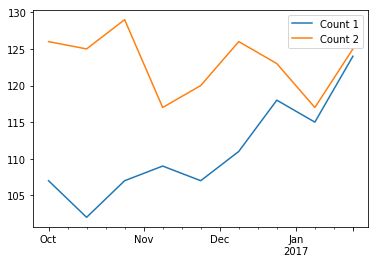

In [106]:
# Plot the time series
import matplotlib.pyplot as plt
%matplotlib inline

df.plot()

# Assignment

In [107]:
# Import Excel
#Energy = pd.ExcelFile('Energy Indicators.xls')  
#Energy = Energy.parse("Energy")

path = 'Resources/Energy Indicators.csv'
Energy = pd.read_csv(path)
Energy.head()

,Unnamed: 0,Energy Supply (pentajoules),Energy Supply per capita (gigajoules),Renewable Electricity Production (%)
0,Afghanistan,321,10,78.67
1,Albania,102,35,100.00
2,Algeria,1 959,51,0.55
3,American Samoa,...,...,0.64
4,Andorra,9,121,88.70


In [108]:
# Rename columns
(Energy.rename(columns={'Unnamed: 0':'Country', 
                        'Energy Supply (pentajoules)':'Energy Supply', 
                        'Energy Supply per capita (gigajoules)':'Energy Supply per Capita',
                        'Renewable Electricity Production (%)':'% Renewable'}, inplace=True))

# Strip spaces from column values, convert '...'' to NaN
Energy['Energy Supply'] = Energy['Energy Supply'].str.replace(' ', '').where(Energy['Energy Supply'] != '...')
Energy['Energy Supply per Capita'] = Energy['Energy Supply per Capita'].str.replace(' ', '').where(Energy['Energy Supply per Capita'] != '...')

# Convert columns to different types
Energy = Energy.astype({'Country': str, 'Energy Supply': float, 'Energy Supply per Capita': float, '% Renewable': float})

# Convert Energy Supply to gigajoules (there are 1,000,000 gigajoules in a petajoule).
Energy['Energy Supply'] *= 1000000

Energy.head()

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,3.210000e+08,10.0,78.67
1,Albania,1.020000e+08,35.0,100.00
2,Algeria,1.959000e+09,51.0,0.55
3,American Samoa,NaN,NaN,0.64
4,Andorra,9.000000e+06,121.0,88.70


In [109]:
# Rename the following list of countries (for use in later questions):
# "Republic of Korea": "South Korea",
# "United States of America": "United States",
# "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
# "China, Hong Kong Special Administrative Region": "Hong Kong"
(Energy['Country'].replace({'Republic of Korea': 'South Korea', 
                      'United States of America':'United States', 
                      'United Kingdom of Great Britain and Northern Ireland':'United Kingdom',
                      'China, Hong Kong Special Administrative Region':'Hong Kong'}, inplace=True))

# There are also several countries with numbers and/or parenthesis in their name.
# Remove text between brakets / parantheses in a column
Energy['Country'] = Energy['Country'].str.replace(r"\(.*\)","")

Energy.head()

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,3.210000e+08,10.0,78.67
1,Albania,1.020000e+08,35.0,100.00
2,Algeria,1.959000e+09,51.0,0.55
3,American Samoa,NaN,NaN,0.64
4,Andorra,9.000000e+06,121.0,88.70


In [110]:
path = 'Resources/World Bank.csv'
GDP = pd.read_csv(path)
GDP.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,537777811.1,548888895.6,546666677.8,751111191.1,800000044.4,1.006667e+09,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.417804e+10,7.549239e+10,8.252614e+10,1.041160e+11,1.139230e+11,1.249130e+11,1.267300e+11,1.026210e+11,9.533720e+10,1.242090e+11
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09


In [111]:
# Use only the last 10 years (2006-2015) of GDP data
# Drop multiple columns based on column index
GDP.drop(GDP.iloc[:, 4:50], inplace=True, axis=1)

# Drop multiple columns based on label
GDP = GDP.drop(['2016', '2017'], axis=1)

GDP.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,2.421475e+09,2.623726e+09,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,7.057598e+09,9.843842e+09,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,4.178948e+10,6.044892e+10,8.417804e+10,7.549239e+10,8.252614e+10,1.041160e+11,1.139230e+11,1.249130e+11,1.267300e+11,1.026210e+11
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,8.992642e+09,1.070101e+10,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,3.543257e+09,4.016972e+09,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09


In [112]:
# Rename column values
# "Korea, Rep.": "South Korea", 
# "Iran, Islamic Rep.": "Iran",
# "Hong Kong SAR, China": "Hong Kong"
(GDP['Country Name'].replace({'Korea, Rep.': 'South Korea', 
                      'Iran, Islamic Rep.':'Iran', 
                      'Hong Kong SAR, China':'Hong Kong'}, inplace=True))

# Rename column to be used as join index later
GDP.rename(columns={'Country Name': 'Country'}, inplace=True)

GDP.head()

,Country,Country Code,Indicator Name,Indicator Code,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,2.421475e+09,2.623726e+09,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,7.057598e+09,9.843842e+09,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,4.178948e+10,6.044892e+10,8.417804e+10,7.549239e+10,8.252614e+10,1.041160e+11,1.139230e+11,1.249130e+11,1.267300e+11,1.026210e+11
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,8.992642e+09,1.070101e+10,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,3.543257e+09,4.016972e+09,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09


In [113]:
path = 'Resources/scimagojr.csv'
ScimEn = pd.read_csv(path)
ScimEn.head()

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,167992,167369,1057626,722578,6.30,176
1,2,United States,126158,123332,1296212,444998,10.27,278
2,3,Japan,37948,37612,316956,85620,8.35,155
3,4,United Kingdom,28998,28176,335914,64609,11.58,170
4,5,India,24872,24300,215787,68150,8.68,141


In [114]:
# Delete rows based on column value, in this case where column value is less than value
#df = df[df.column_name < value]

# Use only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15)
# Drop rows by index
ScimEn.drop(ScimEn.index[15:], inplace=True)
ScimEn

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,167992,167369,1057626,722578,6.30,176
1,2,United States,126158,123332,1296212,444998,10.27,278
2,3,Japan,37948,37612,316956,85620,8.35,155
3,4,United Kingdom,28998,28176,335914,64609,11.58,170
4,5,India,24872,24300,215787,68150,8.68,141
5,6,Germany,24407,23963,231800,48820,9.50,151
6,7,Russian Federation,23361,23196,55495,22485,2.38,69
7,8,Canada,22908,22465,332093,62436,14.50,177
8,9,France,17569,17230,203486,43210,11.58,139
9,10,South Korea,16004,15848,176965,34607,11.06,124


In [115]:
# Join Energy w/ GDP
EnergyGDP = pd.merge(Energy, GDP, how='outer', left_on='Country', right_on='Country')

# Join EnergyGDP with ScimEn
# Inner join so it only returns the 15 countries from ScimEn
Final = pd.merge(EnergyGDP, ScimEn, how='inner', left_on='Country', right_on='Country')

# Drop multiple columns based on label to satisfy assignment conditions
Final = Final.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1)

# Promote column to index to satisfy assignment conditions 
Final = Final.set_index([Final.index, 'Country'])

Final

,,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
,Country,,,,,,,,,,,,,,,,,,,,
0,Australia,5.386000e+09,231.0,11.81,7.455220e+11,8.519630e+11,1.052580e+12,9.264480e+11,1.144260e+12,1.394280e+12,1.543410e+12,1.573700e+12,1.464960e+12,1.349030e+12,14,12635,12397,157471,27620,12.46,131
1,Brazil,1.214900e+10,59.0,69.65,1.107640e+12,1.397080e+12,1.695820e+12,1.667020e+12,2.208870e+12,2.616200e+12,2.465190e+12,2.472810e+12,2.455990e+12,1.802210e+12,13,12705,12559,99136,24398,7.80,103
2,Canada,1.043100e+10,296.0,61.95,1.315420e+12,1.464980e+12,1.549130e+12,1.371150e+12,1.613460e+12,1.788650e+12,1.824290e+12,1.842630e+12,1.799270e+12,1.559620e+12,8,22908,22465,332093,62436,14.50,177
3,China,1.271910e+11,93.0,19.75,2.752130e+12,3.552180e+12,4.598210e+12,5.109950e+12,6.100620e+12,7.572550e+12,8.560550e+12,9.607220e+12,1.048240e+13,1.106470e+13,1,167992,167369,1057626,722578,6.30,176
4,France,1.059700e+10,166.0,17.02,2.318590e+12,2.657210e+12,2.918380e+12,2.690220e+12,2.642610e+12,2.861410e+12,2.683830e+12,2.811080e+12,2.852170e+12,2.438210e+12,9,17569,17230,203486,43210,11.58,139
5,Germany,1.326100e+10,165.0,17.90,3.002450e+12,3.439950e+12,3.752370e+12,3.418010e+12,3.417090e+12,3.757700e+12,3.543980e+12,3.752510e+12,3.890610e+12,3.375610e+12,6,24407,23963,231800,48820,9.50,151
6,India,3.319500e+10,26.0,14.97,9.203170e+11,1.201110e+12,1.186950e+12,1.323940e+12,1.656620e+12,1.823050e+12,1.827640e+12,1.856720e+12,2.039130e+12,2.102390e+12,5,24872,24300,215787,68150,8.68,141
7,Italy,6.530000e+09,109.0,33.67,1.942630e+12,2.203050e+12,2.390730e+12,2.185160e+12,2.125060e+12,2.276290e+12,2.072820e+12,2.130490e+12,2.151730e+12,1.832870e+12,11,15880,15411,184184,45471,11.60,127
8,Japan,1.898400e+10,149.0,10.23,4.530380e+12,4.515260e+12,5.037910e+12,5.231380e+12,5.700100e+12,6.157460e+12,6.203210e+12,5.155720e+12,4.850410e+12,4.394980e+12,3,37948,37612,316956,85620,8.35,155


In [116]:
# What is the average GDP over the last 10 years for each country? (exclude missing values from this calculation.)
# This function should return a Series named avgGDP with 15 countries and their average GDP sorted in descending order.
# Return multiple rows mean

Top15 = Final
Top15['avgGDP'] = Top15[['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',]].mean(axis=1)
Top15 = Top15.sort_values(by=['avgGDP'], ascending=False)
Top15

,,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,...,2014,2015,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,avgGDP
,Country,,,,,,,,,,,,,,,,,,,,,
13,United States,9.083800e+10,286.0,11.57,1.385590e+13,1.447760e+13,1.471860e+13,1.441870e+13,1.496440e+13,1.551790e+13,1.615530e+13,...,1.742760e+13,1.812070e+13,2,126158,123332,1296212,444998,10.27,278,1.563482e+13
3,China,1.271910e+11,93.0,19.75,2.752130e+12,3.552180e+12,4.598210e+12,5.109950e+12,6.100620e+12,7.572550e+12,8.560550e+12,...,1.048240e+13,1.106470e+13,1,167992,167369,1057626,722578,6.30,176,6.940051e+12
8,Japan,1.898400e+10,149.0,10.23,4.530380e+12,4.515260e+12,5.037910e+12,5.231380e+12,5.700100e+12,6.157460e+12,6.203210e+12,...,4.850410e+12,4.394980e+12,3,37948,37612,316956,85620,8.35,155,5.177681e+12
5,Germany,1.326100e+10,165.0,17.90,3.002450e+12,3.439950e+12,3.752370e+12,3.418010e+12,3.417090e+12,3.757700e+12,3.543980e+12,...,3.890610e+12,3.375610e+12,6,24407,23963,231800,48820,9.50,151,3.535028e+12
12,United Kingdom,7.920000e+09,124.0,10.60,2.692610e+12,3.074360e+12,2.890560e+12,2.382830e+12,2.441170e+12,2.619700e+12,2.662090e+12,...,3.022830e+12,2.885570e+12,4,28998,28176,335914,64609,11.58,170,2.741154e+12
4,France,1.059700e+10,166.0,17.02,2.318590e+12,2.657210e+12,2.918380e+12,2.690220e+12,2.642610e+12,2.861410e+12,2.683830e+12,...,2.852170e+12,2.438210e+12,9,17569,17230,203486,43210,11.58,139,2.687371e+12
7,Italy,6.530000e+09,109.0,33.67,1.942630e+12,2.203050e+12,2.390730e+12,2.185160e+12,2.125060e+12,2.276290e+12,2.072820e+12,...,2.151730e+12,1.832870e+12,11,15880,15411,184184,45471,11.60,127,2.131083e+12
1,Brazil,1.214900e+10,59.0,69.65,1.107640e+12,1.397080e+12,1.695820e+12,1.667020e+12,2.208870e+12,2.616200e+12,2.465190e+12,...,2.455990e+12,1.802210e+12,13,12705,12559,99136,24398,7.80,103,1.988883e+12
10,Russian Federation,3.070900e+10,214.0,17.29,9.899310e+11,1.299710e+12,1.660840e+12,1.222640e+12,1.524920e+12,2.051660e+12,2.210260e+12,...,2.063660e+12,1.368400e+12,7,23361,23196,55495,22485,2.38,69,1.668915e+12


In [117]:
# Return dataframe as tuple
# 
Top15Tuple = Final['% Renewable']
Top15Tuple = Top15Tuple.reset_index()
del Top15Tuple['level_0']
Top15Tuple = Top15Tuple.sort_values(by=['% Renewable'], ascending=False)
result = [tuple(x) for x in Top15Tuple.values][0]
result

('Brazil', 69.65)

In [118]:
# Return first row of a non-index column
# df[$ColumnLabel].iloc[0]

# Return mean of a column
#RenewMean = df['$ColumnLabel'].mean()

# Fill a column based on condition
# df['$NewColumn'] = np.where(df['$Column'] >= $value, 1, 0)

In [119]:
'''
Map list to dataframe, group aggregate

Top15 = answer_one()
    Top15['Sum'] = Top15['Mean'] = Top15['Std'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
    Top15 = Top15.reset_index()
    Top15['Continent'] = Top15['Country'].map(ContinentDict)    
    Top15 = Top15.groupby('Continent').agg({'Country': np.size, 'Sum': np.sum, 'Mean': np.mean, 'Std': np.std})

Top15.rename(columns={'Country': 'Size'}, inplace=True)

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-119-120bbb1485ac>, line 25)

In [ ]:
import pandas as pd
import numpy as np

'''
path = 'Resources/catalog_product_entity_media_gallery.csv'
df = pd.read_csv(path)

df.rename(columns={'784': 'Entity Id', '07-1621-01': 'SKU', '/0/7/07-1621_sol_hat_cream_1.jpg':'Image1'}, inplace=True)

df['Image2'] = df['Image3'] = df['Image4'] = df['Image5'] = df['Image6'] =  df['Image7'] = df['Image8'] = df['Image9'] =  df['Image10'] = df['Image11'] = df['Image12'] =None

#df.drop(df.index[54:], inplace=True)
#df.drop(df.index[:34], inplace=True)

lastSKU = ''
drop_rows = []
image = 2

df = df.reset_index()
del df['index']

for index, row in df.iterrows():    
    if row['SKU'] == lastSKU:
        #print(str(row.name - image + 1) + ' Image' + str(image) + ' = ' + row['Image1'])
        #print()
        df['Image' + str(image)].iloc[row.name - image + 1] = row['Image1']
        drop_rows.append(row.name)
        image += 1
    else:
        image = 2
    lastSKU = row['SKU']

#print(drop_rows)
df.drop(df.index[drop_rows], inplace=True)

df.to_csv('dana.csv', encoding='utf-8')

df
'''